<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2025-04-05-nazar-wine-quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Nazar-Popovych/Personal/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


You do not always use all the data.  For example, is it useful to know the name of the man who made the wine?  What about the make who loaded in the truck?

In [ ]:
np.set_printoptions(suppress=True)

print ("\t fixed acidity \t\t volatile acidity \t\t citric acid \t\t residual sugar \t\t chlorides \t\t free sulfur dioxide \t\t total sulfur dioxide \t\t density \t\t pH \t\t sulphates \t\t alcohol \t\t quality")
np.column_stack([df['fixed acidity'], df['volatile acidity'], df['citric acid'], df['residual sugar'], df['chlorides'], df['free sulfur dioxide'], df['total sulfur dioxide'], df['density'], df['pH'], df['sulphates'], df['alcohol'], df['quality']])

	 fixed acidity 		 volatile acidity 		 citric acid 		 residual sugar 		 chlorides 		 free sulfur dioxide 		 total sulfur dioxide 		 density 		 pH 		 sulphates 		 alcohol 		 quality


array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#Goal

The goal is to predict quality.  

1.  was there frost that year?
2.  who is the winemaker?
3.  average price in that region?


They found that these metrics are positively correlated with wine quality.  So it is a useful model.

For example if you have too much sulfur dioxide makes your wine smell like rotten eggs.


In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)

x = df[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df[['fixed acidity']]

reg.fit(x, y)

print("coefficient:", reg.coef_[0])
print("intercept:", reg.intercept_)

coefficient: [  0.23212351   1.89036739  -0.24915772  -3.77068082   0.00921564
  -0.00650747 654.82438478  -5.30524033  -0.67002811   0.55461812]
intercept: [-631.66424102]


In [ ]:
preds = reg.predict(x)

np.column_stack([x,y,preds])

array([[ 0.7       ,  0.        ,  1.9       , ...,  9.4       ,
         7.4       ,  7.21896433],
       [ 0.88      ,  0.        ,  2.6       , ...,  9.8       ,
         7.8       ,  8.04889769],
       [ 0.76      ,  0.04      ,  2.3       , ...,  9.8       ,
         7.8       ,  8.01922096],
       ...,
       [ 0.51      ,  0.13      ,  2.3       , ..., 11.        ,
         6.3       ,  7.33639924],
       [ 0.645     ,  0.12      ,  2.        , ..., 10.2       ,
         5.9       ,  6.03948528],
       [ 0.31      ,  0.47      ,  3.6       , ..., 11.        ,
         6.        ,  7.58409724]])

In [ ]:
pd.DataFrame(np.column_stack([x,y,preds]))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7.4,7.218964
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,7.8,8.048898
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,7.8,8.019221
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,11.2,10.266194
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,7.4,7.218964
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,6.2,6.413733
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,5.9,6.554961
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.3,7.336399
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.9,6.039485


In [ ]:
mse = mean_squared_error(y, preds)

r2 = r2_score(y, preds)

print(f"Mean Squared Error (MSE): {mse:.4f}")

print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.3900
R-squared (R²): 0.8713


In [ ]:
len(y)

1599

In [ ]:
# Print every 10th number

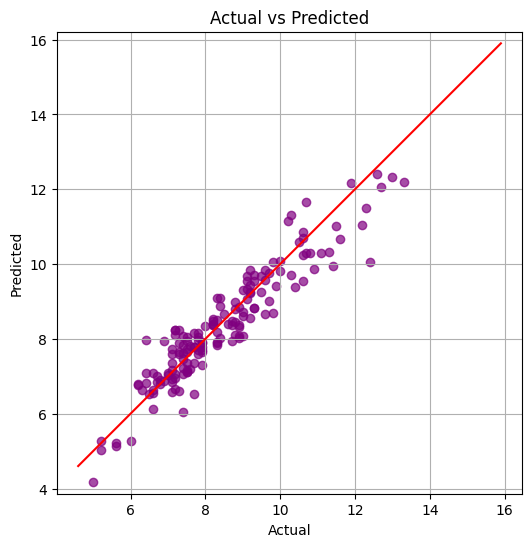

In [ ]:
plt.figure(figsize=(6, 6))

plt.scatter(y[::10], preds[::10], alpha=0.7, color='purple')

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.axis('equal')
plt.show()